# k-means(K-평균)
- 군집화를 한다 => grouping
- 군진화가 된 상태에서 size에 따라 가까운 거리의 size에 대한 평균을 구한다.
- size를 조절하면서 적절한 평균값을 나타내는 것을 찾는다.
- 군진화를 하여 그룹을 찾는다 => clustering

- 대표적인 군집 알고리즘으로 군집의 중심을 찾는 작업 
- 클러스터(cluster): 군집
- 클러스터링(clustring): 군진화 하는 작업
- k : hyper parameter

<img src="../Data/k-means.png" width="300">

In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import numpy as np 
fruits = np.load("../Data/fruits.npy")
fruits.shape
# 페이지 ,행, 열 

(300, 100, 100)

In [3]:
# 3차원 데이터를 2차원 데이터로 변경
fruits_2d = fruits.reshape(-1, 100 * 100)
fruits_2d.shape

(300, 10000)

# K-means model

In [15]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters =3, random_state = 42)   # n_clusters=8 (default)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

> 비지도학습이므로(정답을 알려주지 않음) fit에 target이 없다.

In [16]:
# 군집화 label 출력해보기
# 시스템(내장변수) 라벨이므로 _
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

> 군집화 이므로 target이 뭔지 몰라 숫자값이 표현됨

In [17]:
# 군집화한 cluster와 각 cluster의 갯수 확인하기
print(np.unique(km.labels_, return_counts=True))
# return_counts=True = 각 갯수 확인하기 

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


---

In [30]:
import matplotlib.pyplot as plt
# 사용자 정의 함수 

def draw_fruits(arr, ratio =1): # ratio=1 안쓸때 default
    n = len(arr)    # n은 샘플 갯수
    # 한 줄에 10개씩 이미지 그리기 , 샘플갯수를 10으로 나누어 전체 행 갯수 계산 
    rows= int(np.ceil(n/10)) # 올림처라ㅣ 
    # 행이 1개이면 열 갯수가 샘플 갯수이고 그렇지 않으면 10개( 11개 이면 다음줄에 하나더)
    cols = n if rows < 2  else 10
    # squeeze = false 한줄로도 나오게 허용 (n *m => n*1)
    # 2차원을 압축해서 표현
    fig , axs = plt.subplots(rows,cols,figsize =(cols* ratio, rows*ratio),squeeze=False)
    # 시각화 
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n: # n개까지만 그리기 
                axs[i,j].imshow(arr[i*10 + j], cmap="YlGn")
            axs[i,j].axis("off") # 축 가리기 
    plt.show()


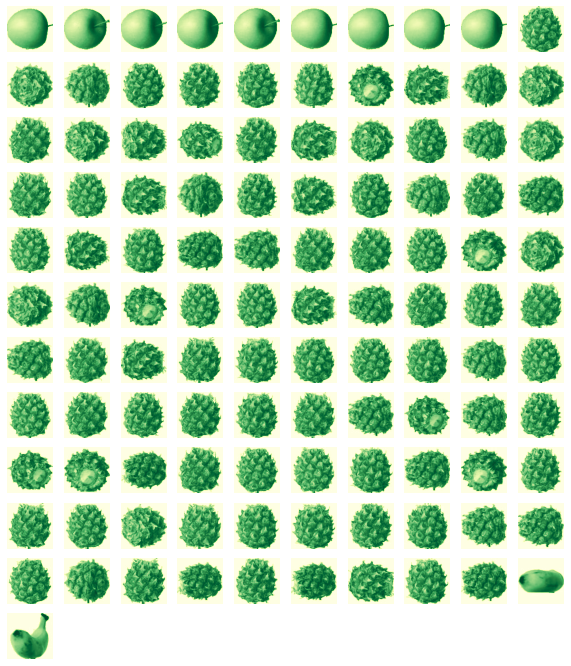

In [33]:
draw_fruits(fruits[km.labels_ == 0])

> cluster 0번이 파인애플이다 

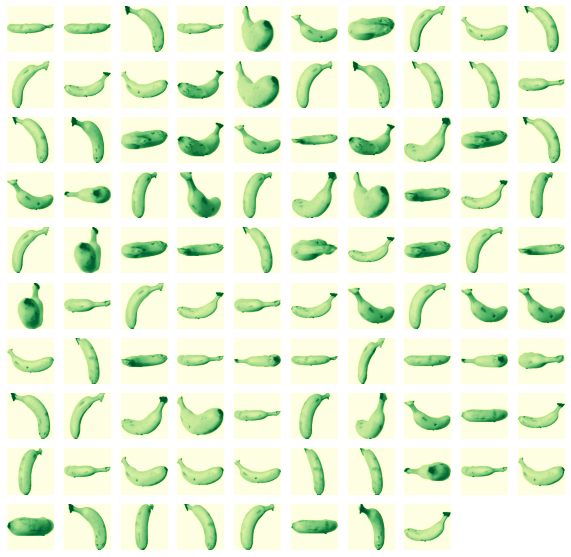

In [32]:
draw_fruits(fruits[km.labels_ == 1])

> cluster 1번이 바나나이다 

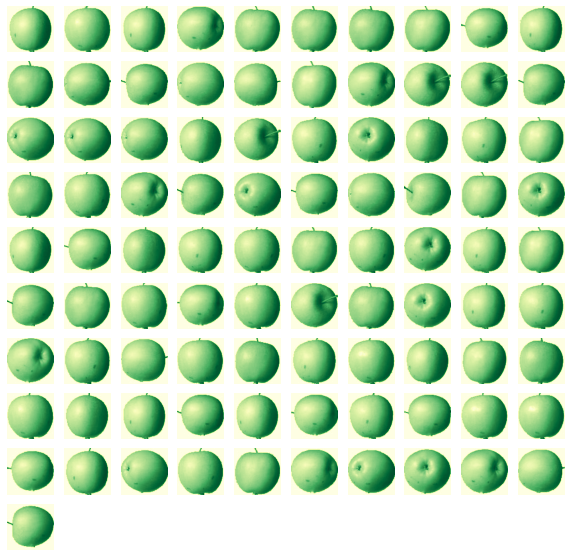

In [34]:
draw_fruits(fruits[km.labels_ == 2])

> cluster 2번이 사과이다<br>
> 이미지 순서와 상관없으므로 직접 확인해야함  

### cluster의 중심

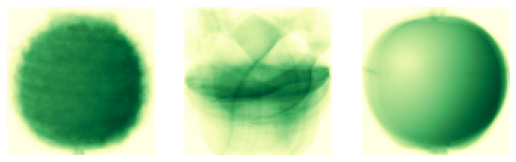

In [36]:
draw_fruits(km.cluster_centers_.reshape(-1,100,100), ratio=3)

In [39]:
# 100번째 클러스터 중심 찾기
print(km.transform(fruits_2d[100:101]))

[[3374.06980304 8823.8971254  5252.22899617]]


In [37]:
# 100번째 예측 군집값
print(km.predict(fruits_2d[100:101]))

[0]


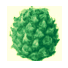

In [41]:
#그림으로 확인하기
draw_fruits(fruits[100:101])

In [42]:
# km의 반복학습 횟수 (iter)
km.n_iter_

4

> 기본 반복횟수는 300번이나 현재 4번안에 최적값을 찾았다는 의미

---
### 최적의 k값 찾기 
- k-means 에서 k는 hyper parameter이므로 k값을 찾는 것이 중요하다.

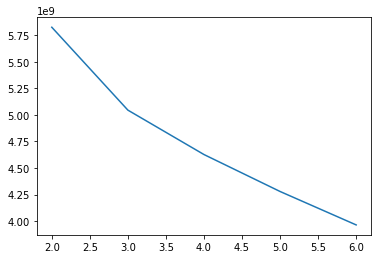

In [43]:
inertia = []
for k in range(2,7):
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(2,7),inertia)
plt.show()



> Elbow Method(최적의 군집 수 구하기)로 판단하면 클러스터가 3인 경우가 최적의 군집수 이다